## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import warnings
sb.set() 
warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Dataset

In [2]:
data = pd.read_csv("cleaned-Housing.csv")
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990


## Bar plot for resale_price

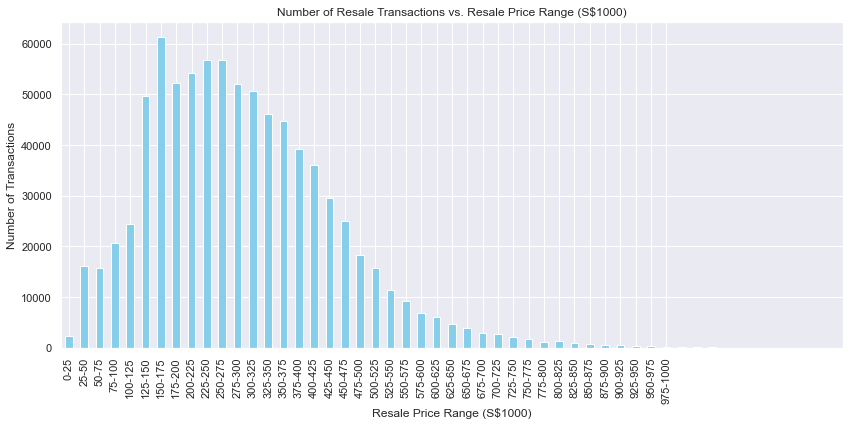

In [3]:
df = pd.DataFrame(data)

# Group resale prices into intervals (e.g., 25k intervals)
df['price_group'] = (df['resale_price'] // 25000) * 25000

# Count the number of transactions for each price group
resale_counts = df['price_group'].value_counts()

# Sort the price groups in increasing order
resale_counts = resale_counts.sort_index()

# Generate labels for the price groups
price_labels = [f"{i//1000}-{(i+25000)//1000}" for i in range(0, 1000000, 25000)]

# Plotting the bar graph
plt.figure(figsize=(14, 6))  # Adjust figure size if needed
resale_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Resale Price Range (S$1000)')
plt.ylabel('Number of Transactions')
plt.title('Number of Resale Transactions vs. Resale Price Range (S$1000)')

# Customize x-axis labels
plt.xticks(range(len(price_labels)), price_labels, rotation=90)

# Show plot
plt.show()

## Box plot and bar plot for `flat_type`, `storey_range`, `flat_model`, `town` against `resale_price`

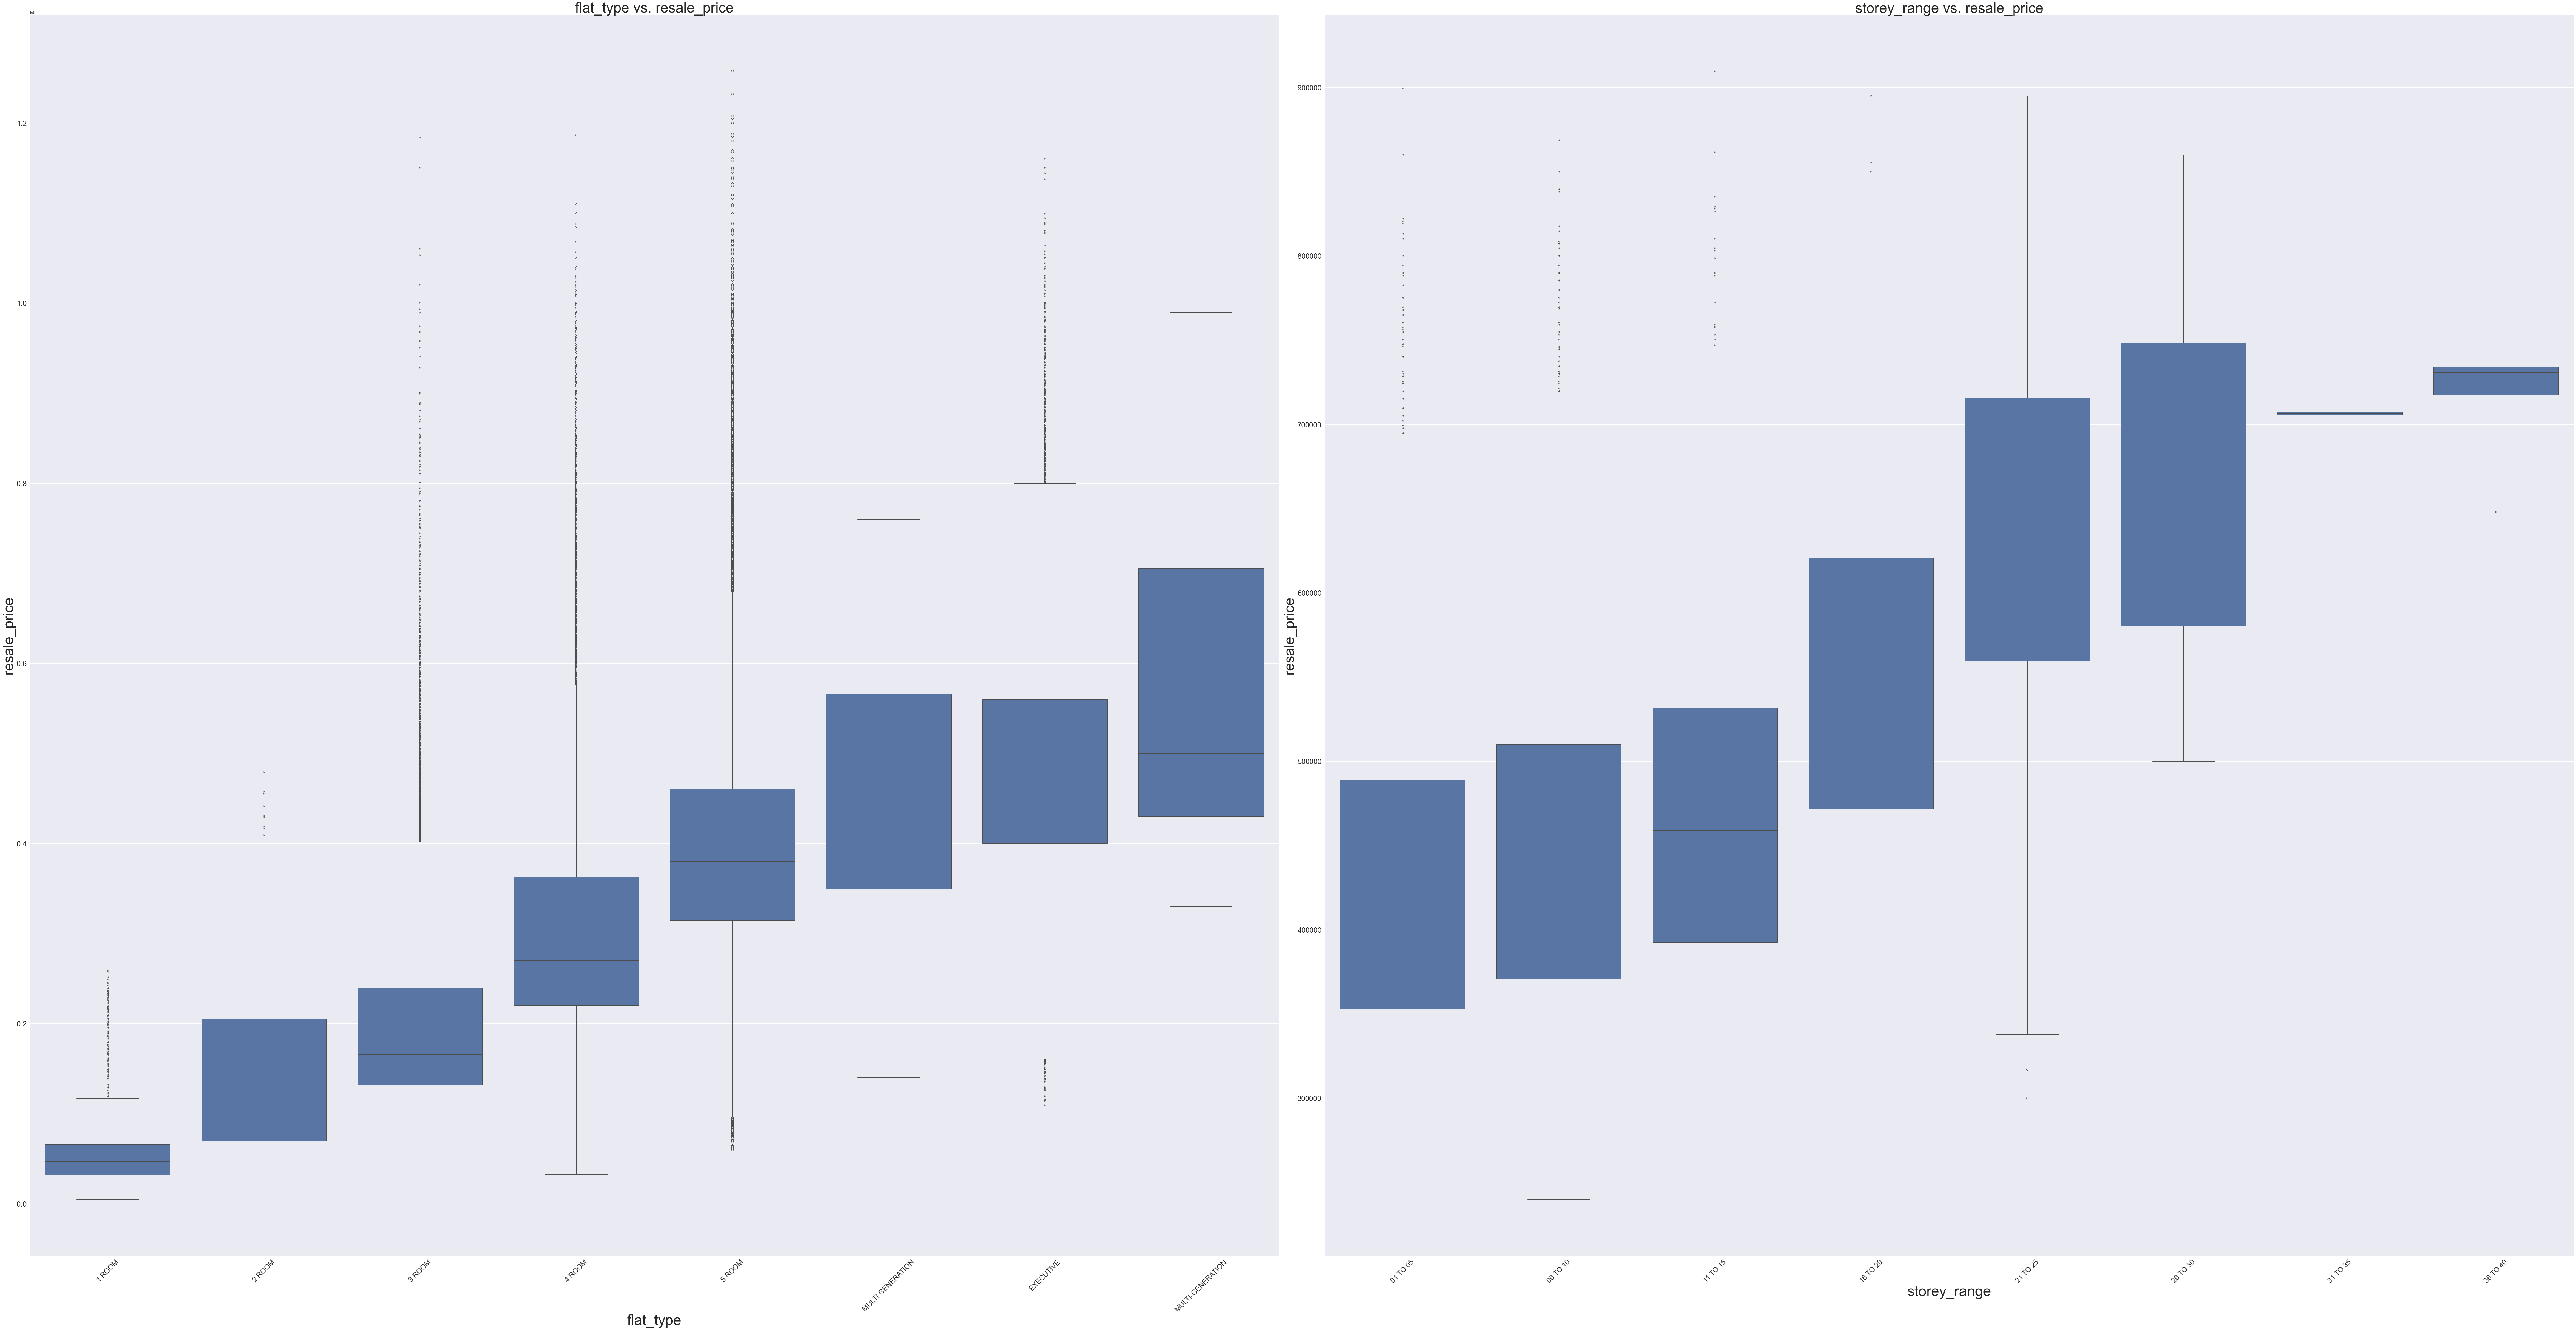

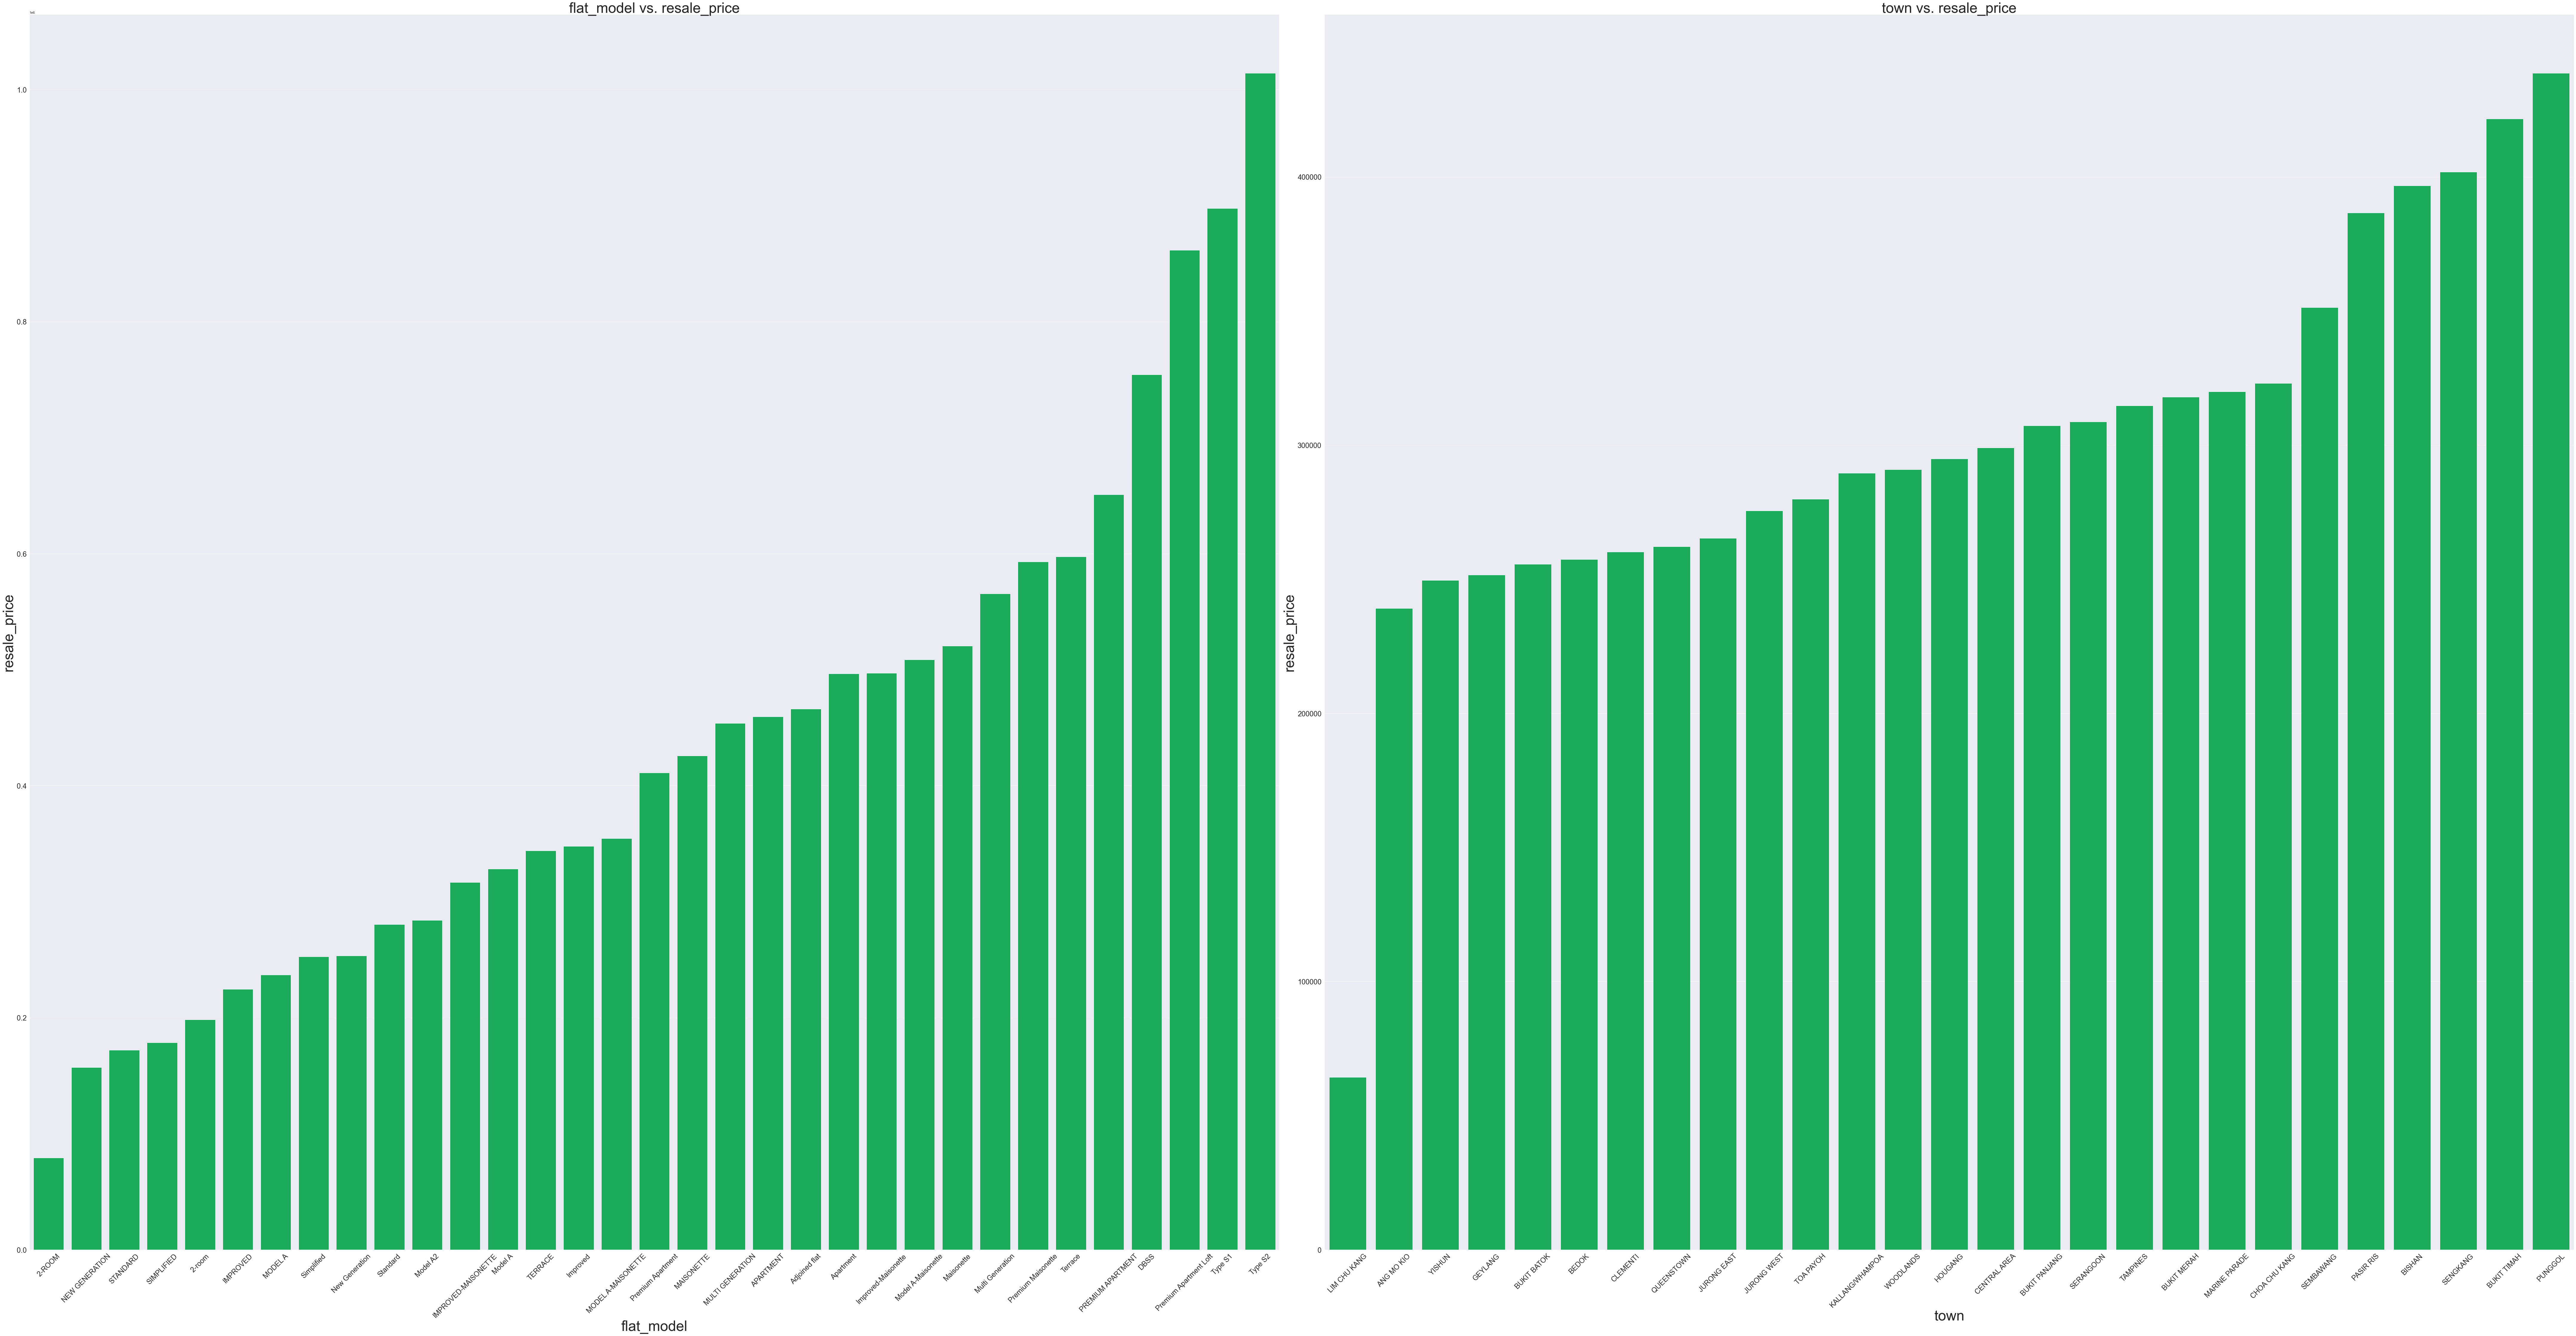

In [4]:
# Define the features and target variable
features = ['flat_type', 'storey_range', 'flat_model', 'town']
target = 'resale_price'

# Set figure size
plt.figure(figsize=(120, 120))

# Convert 'storey_range' to a categorical type with ordered categories
data['storey_range'] = pd.Categorical(data['storey_range'],
                                      categories=['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '31 TO 35', '36 TO 40'],
                                      ordered=True)

# Loop over features
for i, feature in enumerate(features):
    if i==2:
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(120, 120))
    plt.subplot(2, 2, i + 1)
    order = data.groupby([feature])[target].mean().sort_values().index
    if i<2:
        sb.boxplot(x=data[feature], y=data[target], order=order)
    else:
        sb.barplot(x=data[feature], y=data[target], ci=None, color='#06C258', order=order)
    plt.title(f'{feature} vs. {target}', fontsize=48)  # Adjust title fontsize
    plt.xlabel(feature, fontsize=48)  # Adjust x-axis label fontsize
    plt.ylabel(target, fontsize=48)  # Adjust y-axis label fontsize
    plt.xticks(rotation=45, fontsize=24)  # Adjust x-axis tick label fontsize
    plt.yticks(fontsize=24)  # Adjust y-axis tick label fontsize
    
# Adjust layout
plt.tight_layout()
plt.show()

## Scatter plot and violin plot for `floor_area_sqm` against `resale_price`

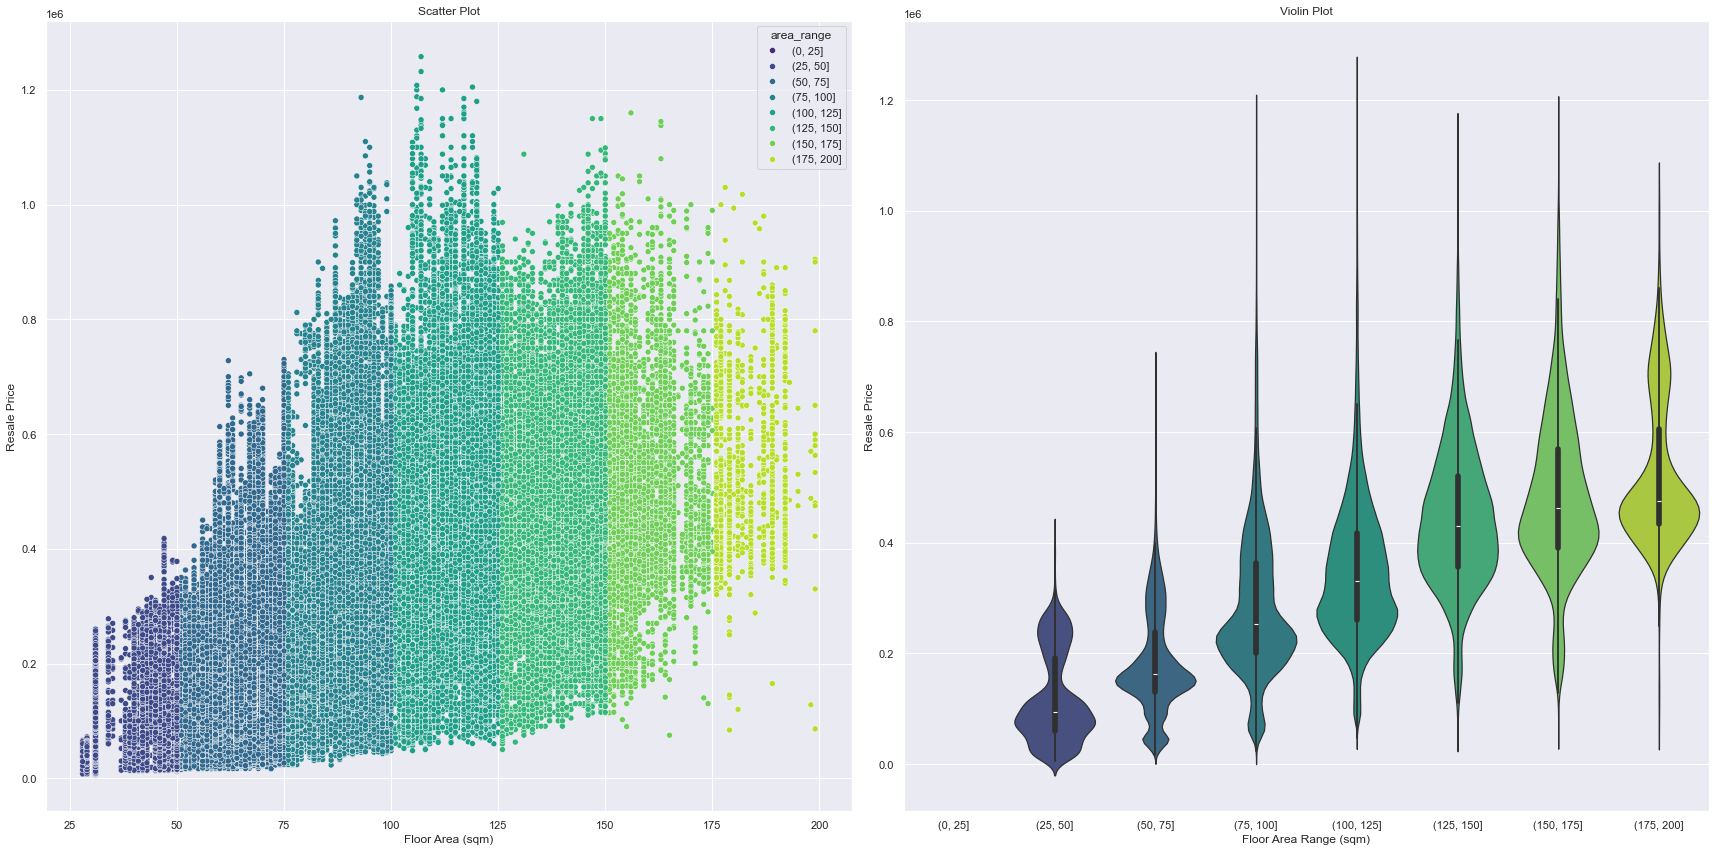

In [5]:
df = pd.DataFrame(data)
bins = [0, 25, 50, 75, 100, 125, 150, 175, 200] 
df['area_range'] = pd.cut(df['floor_area_sqm'], bins)
# Plot
plt.figure(figsize=(24, 12))

# Scatter plot
plt.subplot(1, 2, 1)
sb.scatterplot(data=df, x='floor_area_sqm', y='resale_price', hue='area_range', palette='viridis')
plt.title('Scatter Plot')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')

# Violin plot
plt.subplot(1, 2, 2)
sb.violinplot(data=df, x='area_range', y='resale_price', palette='viridis')
plt.title('Violin Plot')
plt.xlabel('Floor Area Range (sqm)')
plt.ylabel('Resale Price')

plt.tight_layout()
plt.show()

## Bar plot for `floor_area` against average `resale_price`

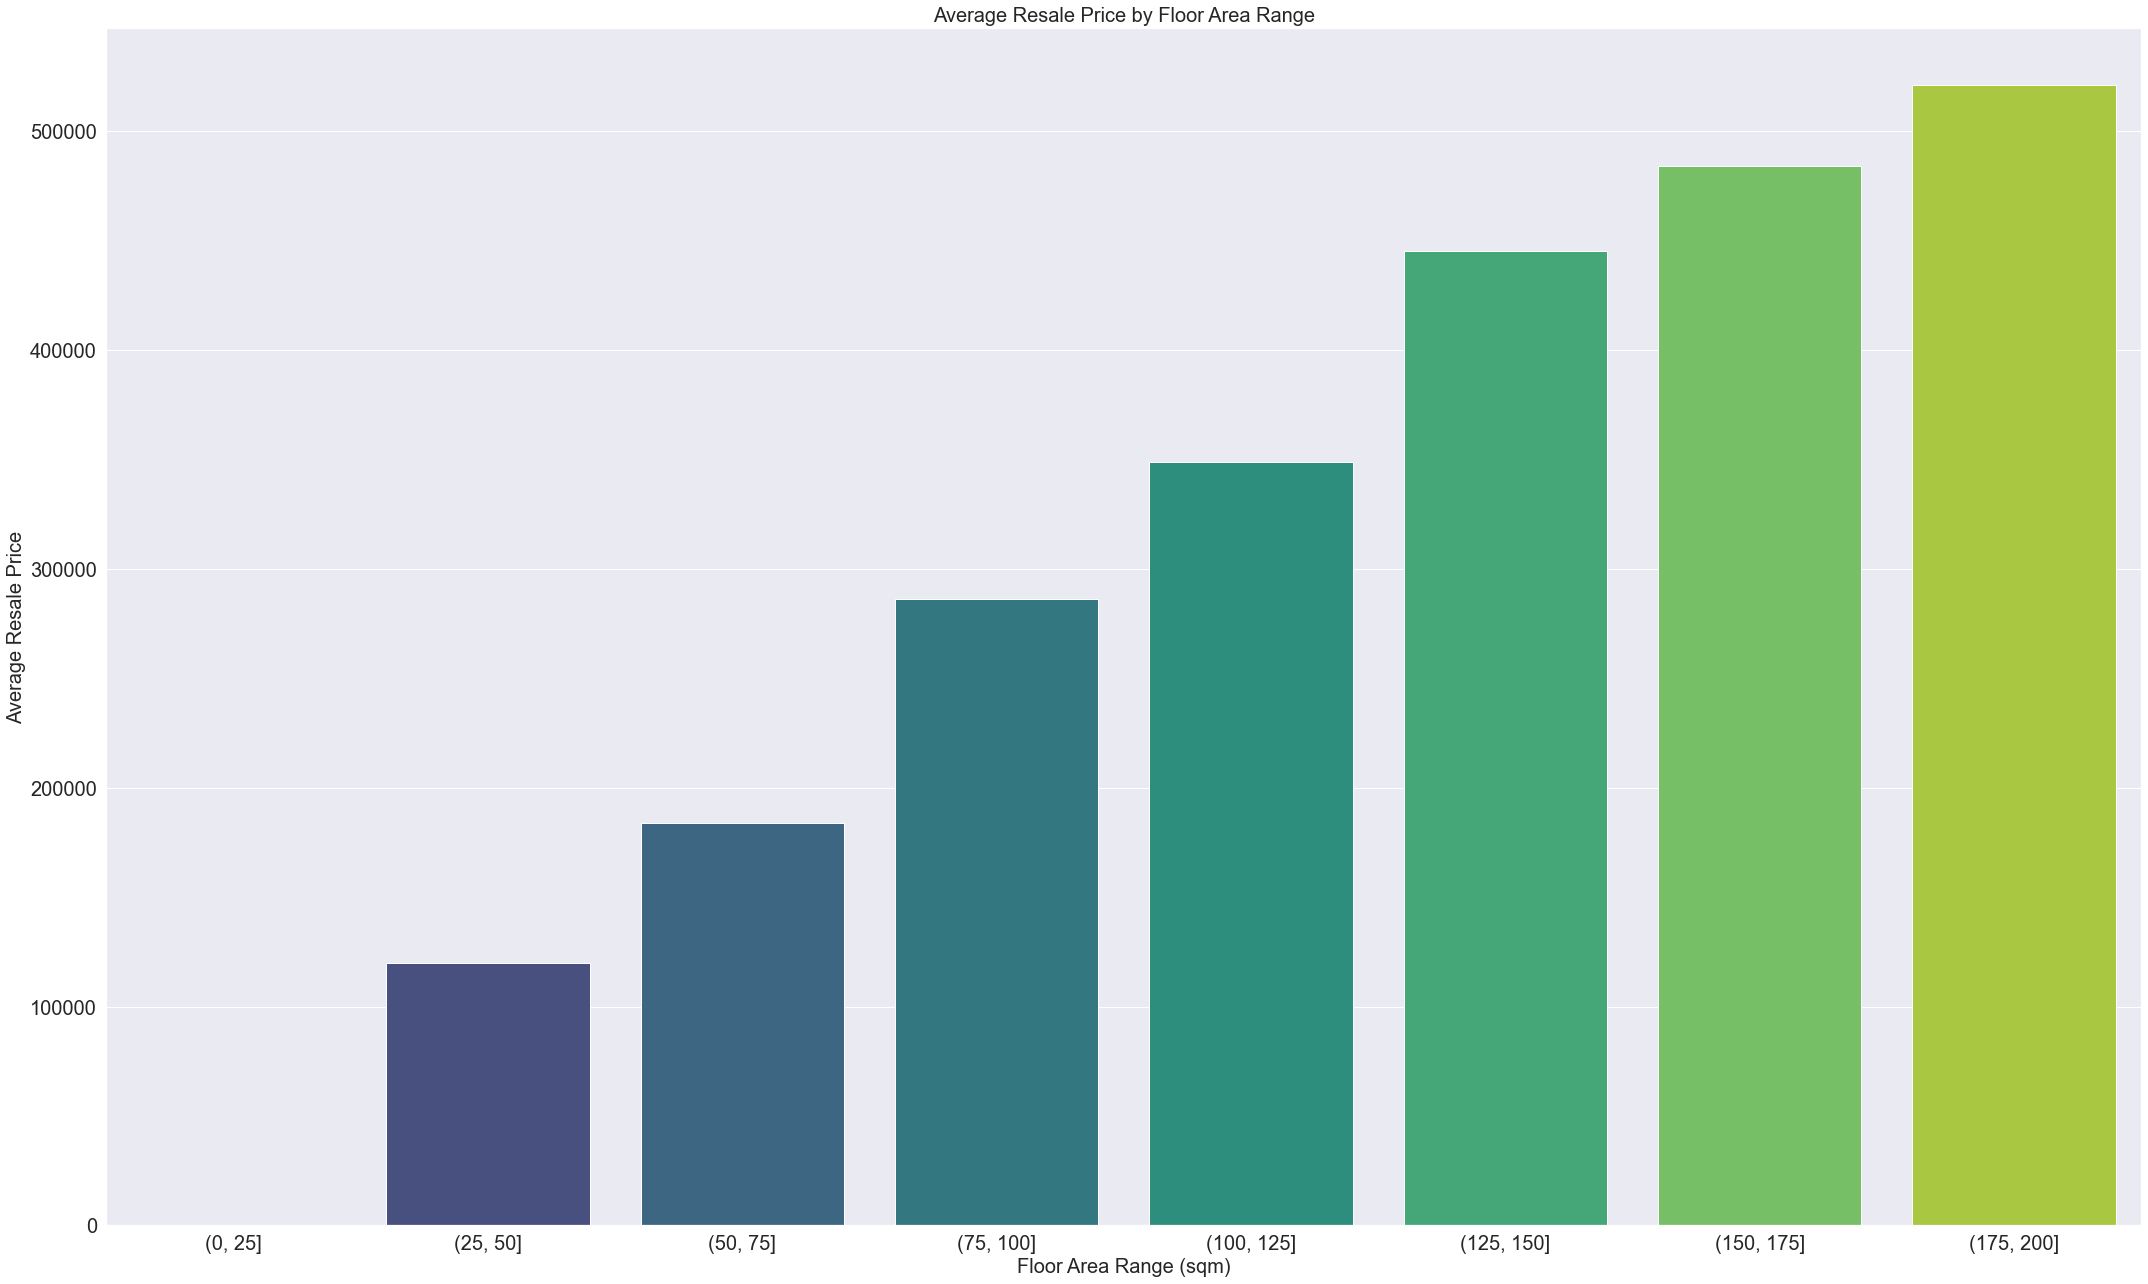

In [6]:
avg_prices = df.groupby('area_range')['resale_price'].mean().reset_index()
plt.figure(figsize=(30, 18))

# Bar plot
sb.barplot(data=avg_prices, x='area_range', y='resale_price', palette='viridis')
plt.title('Average Resale Price by Floor Area Range', fontsize=20)
plt.xlabel('Floor Area Range (sqm)',fontsize=20)
plt.ylabel('Average Resale Price',fontsize=20)

# Increase font size of tick labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Increase font size of axis markings
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)

plt.tight_layout()
plt.show()

## Visualising average `resale_price` over time

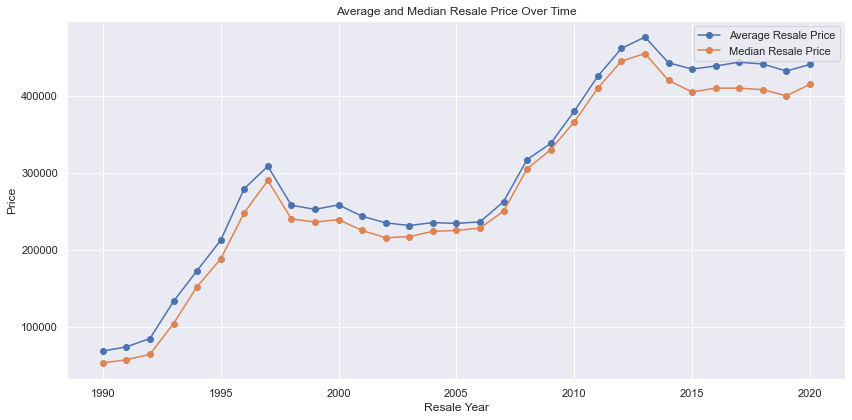

In [7]:
# Calculate the average and median resale price for each year
avg_prices = df.groupby('resale_year')['resale_price'].mean().reset_index()
median_prices = df.groupby('resale_year')['resale_price'].median().reset_index()

# Plot
plt.figure(figsize=(12, 6))

# Plot the average resale price trend line
plt.plot(avg_prices['resale_year'].to_numpy(), avg_prices['resale_price'].to_numpy(), marker='o', linestyle='-', label='Average Resale Price')

# Plot the median resale price trend line
plt.plot(median_prices['resale_year'].to_numpy(), median_prices['resale_price'].to_numpy(), marker='o', linestyle='-', label='Median Resale Price')

plt.title('Average and Median Resale Price Over Time')
plt.xlabel('Resale Year')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

## Correlation heatmap between `floor_area_sqm`, `lease_commence_date`, `resale_year`, and `resale_price`

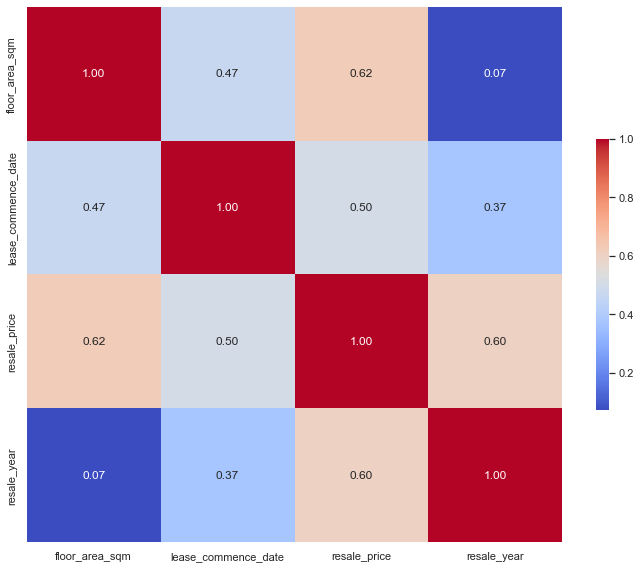

In [8]:
# Remove any columns that are unnamed
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
# Exclude non-numeric columns and calculate the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # This will select only the numeric columns
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))

sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

plt.show()